In [1]:

from src.data_objects import *
import json
import pandas as pd
import nltk
import numpy as np
from more_itertools import split_after

from nltk import word_tokenize, pos_tag, ne_chunk
from nltk import RegexpParser
from nltk import Tree
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

import pandas_gpt
import openai
with open("data_sources.json") as f:
    data = f.read()

js = json.loads(data)
key = js["openai"]['api_key']

if key == '':
    print(f"get an api key at https://platform.openai.com/account/api-keys")
else:
    openai.api_key = key

In [2]:
focus_list = ["ADBE", "AMZN", "LMT", "LOW", "ORLY"]
pm = Portfolio(focus_list)
pm.get_fundamental_data()
df = pm.fundamentals

In [24]:
df.head()

,ticker,year,quarter,numberonly,category,lineitem,filing_date,key_phrases
0,ADBE,2010,1Q,858.700000,income statement,Total Revenue,2010-02-28,total revenue
1,ADBE,2010,2Q,943.000000,income statement,Total Revenue,2010-05-31,total revenue
2,ADBE,2010,2Q,0.098172,income statement,quarter over quarter growth in - Total Revenue,2010-05-31,"quarter growth,total revenue"
3,ADBE,2010,3Q,990.300000,income statement,Total Revenue,2010-08-31,total revenue
4,ADBE,2010,3Q,0.050159,income statement,quarter over quarter growth in - Total Revenue,2010-08-31,"quarter growth,total revenue"


In [3]:
def clean_df(df):

    replacers = {'Q/Q': 'quarter over quarter growth in ',
    'Y/Y': 'year over year growth in ',
    '(Y/Y)':'year over year growth in',
    'TTM': 'trailing twelve months',
    '/': ' per ',
    'Incr.' : 'incremental',
    '$': 'dollars of ',
    "IS":'income statement',
    'BS':'balance sheet',
    'KM':'key metrics'}

    df['filing_date']=pd.to_datetime(df['filing_date'])

    df['lineitem'] = (
        df.lineitem.str.replace('[...…]','')
        .str.split()
        .apply(lambda x: ' '.join([replacers.get(e, e) for e in x]))
    )
    df['category'] = (
        df.category.str.replace('[...…]','')
        .str.split()
        .apply(lambda x: ' '.join([replacers.get(e, e) for e in x]))
    )

    df = df[['ticker', 'year', 'quarter',
       'numberonly', 'category',
       'lineitem','filing_date']]
    
    def get_noun_phrases(text):
        blob = TextBlob(text).noun_phrases
        return ','.join(blob)

    df['key_phrases'] = df['lineitem'].apply(lambda sent: get_noun_phrases((sent)))
    
    return df

In [4]:
data = clean_df(df).copy()

In [5]:
data.head()

,ticker,year,quarter,numberonly,category,lineitem,filing_date,key_phrases
0,ADBE,2010,1Q,858.700000,income statement,Total Revenue,2010-02-28,total revenue
1,ADBE,2010,2Q,943.000000,income statement,Total Revenue,2010-05-31,total revenue
2,ADBE,2010,2Q,0.098172,income statement,quarter over quarter growth in - Total Revenue,2010-05-31,"quarter growth,total revenue"
3,ADBE,2010,3Q,990.300000,income statement,Total Revenue,2010-08-31,total revenue
4,ADBE,2010,3Q,0.050159,income statement,quarter over quarter growth in - Total Revenue,2010-08-31,"quarter growth,total revenue"


In [6]:

data.ask("get key phrases contains ((total revenue) and (quarter growth)) ticker AMZN")


,ticker,year,quarter,numberonly,category,lineitem,filing_date,key_phrases
2,AMZN,2010,2Q,-0.079232,income statement,quarter over quarter growth in - Total Revenue,2010-06-30,"quarter growth,total revenue"
4,AMZN,2010,3Q,0.151386,income statement,quarter over quarter growth in - Total Revenue,2010-09-30,"quarter growth,total revenue"
6,AMZN,2010,4Q,0.712698,income statement,quarter over quarter growth in - Total Revenue,2010-12-31,"quarter growth,total revenue"
10,AMZN,2011,1Q,-0.238724,income statement,quarter over quarter growth in - Total Revenue,2011-03-31,"quarter growth,total revenue"
13,AMZN,2011,2Q,0.005681,income statement,quarter over quarter growth in - Total Revenue,2011-06-30,"quarter growth,total revenue"
16,AMZN,2011,3Q,0.097145,income statement,quarter over quarter growth in - Total Revenue,2011-09-30,"quarter growth,total revenue"
19,AMZN,2011,4Q,0.602703,income statement,quarter over quarter growth in - Total Revenue,2011-12-31,"quarter growth,total revenue"
24,AMZN,2012,1Q,-0.243589,income statement,quarter over quarter growth in - Total Revenue,2012-03-31,"quarter growth,total revenue"
27,AMZN,2012,2Q,-0.026621,income statement,quarter over quarter growth in - Total Revenue,2012-06-30,"quarter growth,total revenue"
30,AMZN,2012,3Q,0.075736,income statement,quarter over quarter growth in - Total Revenue,2012-09-30,"quarter growth,total revenue"


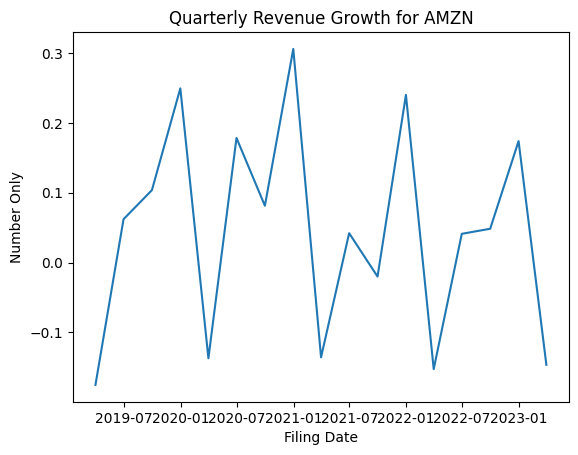

In [7]:

data.ask("plot titled (quarterly revenue growth) numberonly versus filing_date for get key phrases contains ((total revenue) and (quarter growth)) ticker AMZN starting from 2019 sort by filing_date")

In [8]:
data.ask("1Q income statement Total Revenue for ticker AMZN and year 2023")

,ticker,year,quarter,numberonly,category,lineitem,filing_date,key_phrases
177,AMZN,2023,1Q,127358.0,income statement,Total Revenue,2023-03-31,total revenue


In [9]:

data.ask("get unique key phrases contains (aws) for AMZN in 2023 1Q")

array(['aws', 'year growth,aws', 'quarter growth,aws', 'cc,aws',
       'aws,ebit', 'margin,aws,ebit', 'margin,year growth,aws,ebit',
       'aws,expenses', 'year growth,aws,expenses',
       'quarter growth,aws,expenses', '% revenue,aws,expenses'],
      dtype=object)

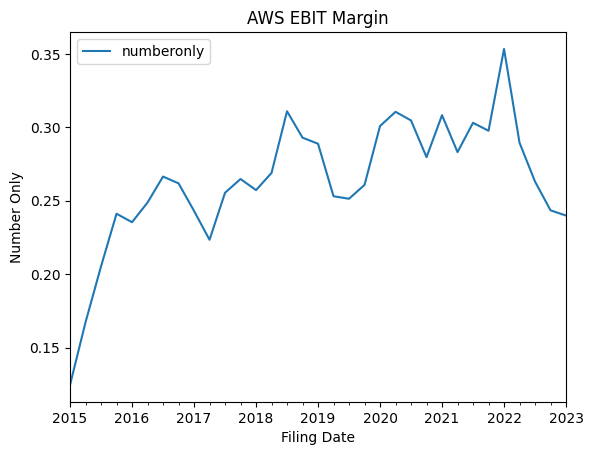

In [23]:

data.ask("get key phrases contains (ebit and margin and aws) and key phrases does not contain (growth) for ticker AMZN plot numberonly vs filing_date titled (AWS EBIT Margin)")